In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

In [4]:
def viz_3d(x,y,z,color):
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=color, marker='o')  # 'c' specifies the color, 'marker' is the marker style
    ax.set_xlabel('X Label - r1')
    ax.set_ylabel('Y Label - r2')
    ax.set_zlabel('Z Label - r3')
    for x, y, z, frame in zip(x, y, z, color):
        ax.text(x-0.05, y, z, str(frame), fontsize=6, color='black', ha='right')
    cbar = plt.colorbar(scatter)
    plt.show()

In [2]:
# import extrinsic parameters
extrinsic_path = "../parameters/cyl1_exposure30000_360frames_flat.csv"
extrinsic_params = pd.read_csv(extrinsic_path)
extrinsic_params

,frame,r1,r2,r3,t1,t2,t3
0,0,0.507764,0.255371,-1.561173,-8.002489,3.597211,629.390792
1,1,-0.496937,-0.288388,-1.566702,-7.925708,3.574687,625.822397
2,2,0.497655,0.289469,-1.565701,-7.865164,3.567043,623.863521
3,3,0.495761,0.303081,-1.566670,-7.799187,3.550515,620.894666
4,4,0.494740,0.320807,-1.566604,-7.745727,3.529022,618.818822
...,...,...,...,...,...,...,...
75,355,-0.527254,-0.153772,-1.554733,-8.355232,3.702798,646.791064
76,356,0.528337,0.155772,-1.552813,-8.308626,3.693172,645.022114
77,357,0.525041,0.178099,-1.554128,-8.261701,3.671527,641.960968
78,358,-0.508815,-0.205195,-1.560739,-8.198871,3.655357,638.523298


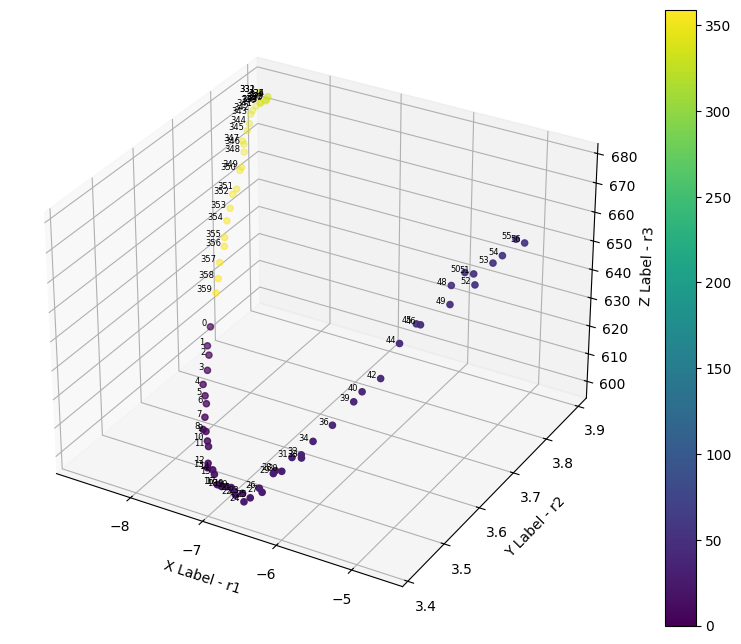

In [5]:
# viz translation matrix
# The tvec of a marker is the translation (x,y,z) of the marker from the origin
x = extrinsic_params['t1']
y = extrinsic_params['t2']
z = extrinsic_params['t3']
color = extrinsic_params['frame']

viz_3d(x,y,z,color)

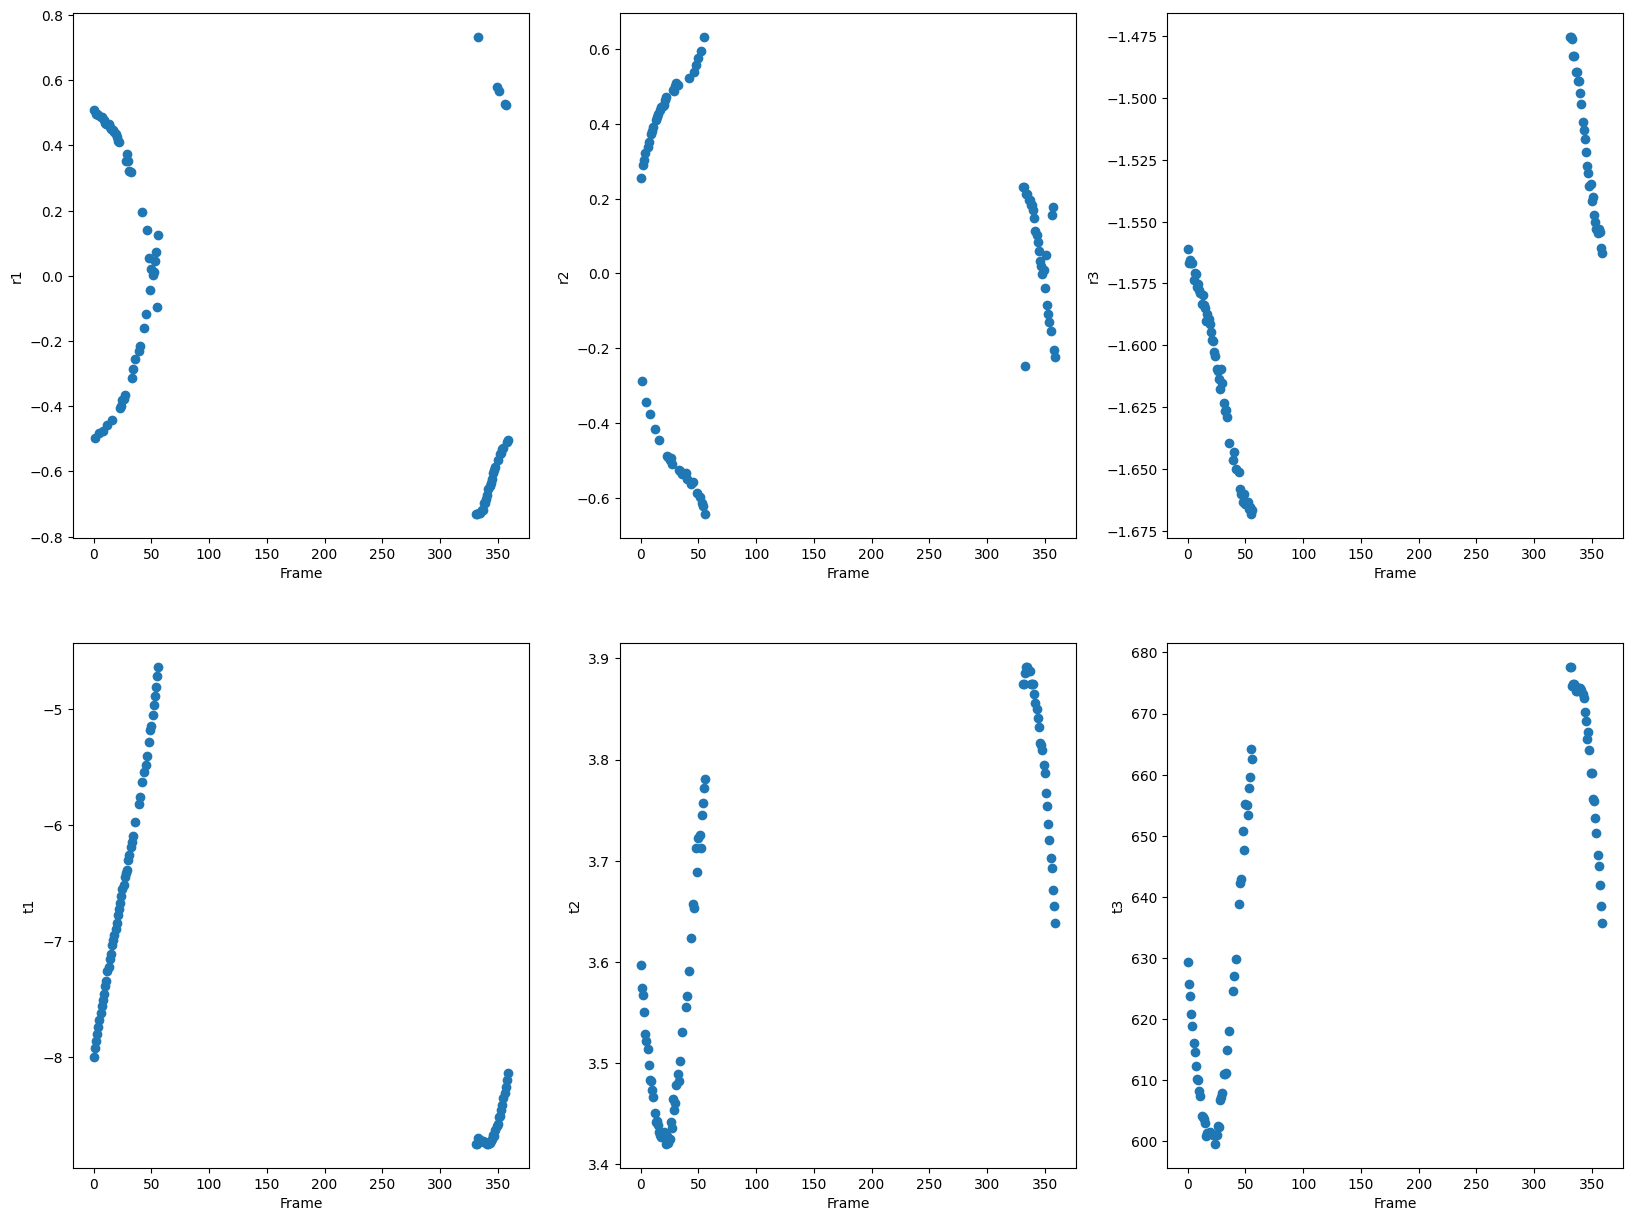

In [6]:
# plot angle with each rvecs/tvecs values
angle = extrinsic_params['frame']
params = [extrinsic_params['r1'],extrinsic_params['r2'],extrinsic_params['r3'],
    extrinsic_params['t1'],extrinsic_params['t2'],extrinsic_params['t3']]
ylabel = ['r1','r2','r3','t1','t2','t3']

plt.figure(figsize=(20,15))
for i in range(len(params)):
    plt.subplot(2, int(len(params)/2), i + 1)
    plt.scatter(angle,params[i])
    plt.xlabel('Frame')
    plt.ylabel(ylabel[i])

In [14]:
angles = np.array(extrinsic_params['frame'])
t2s = np.array(extrinsic_params['t2'])

In [43]:
# sin-like function
initial_guess = [np.ptp(t2s) / 2, 2 * np.pi, 0, np.mean(t2s)]
initial_guess


[0.23573001450000008, 6.283185307179586, 0, 3.6341585912875005]

In [10]:
# Define the sine function to fit
def sin_func(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C

In [45]:
# Fit the sine function to the data
params, covariance = curve_fit(sin_func, angles, t2s, method='trf', p0=initial_guess)

#print(params, covariance )
# Get the parameters of the fitted sine function
A, omega, phi, C = params
print(A, omega, phi, C)

1.1835563868889631 6.299912473267184 -1.8155905487427062 4.653850037538628


In [46]:
# Generate simulated data using the fitted sine function
simulated_angles = np.linspace(min(angles), max(angles), 360)
simulated_t2s = sin_func(simulated_angles, A, omega, phi, C)

Text(0, 0.5, 'simulated t2')

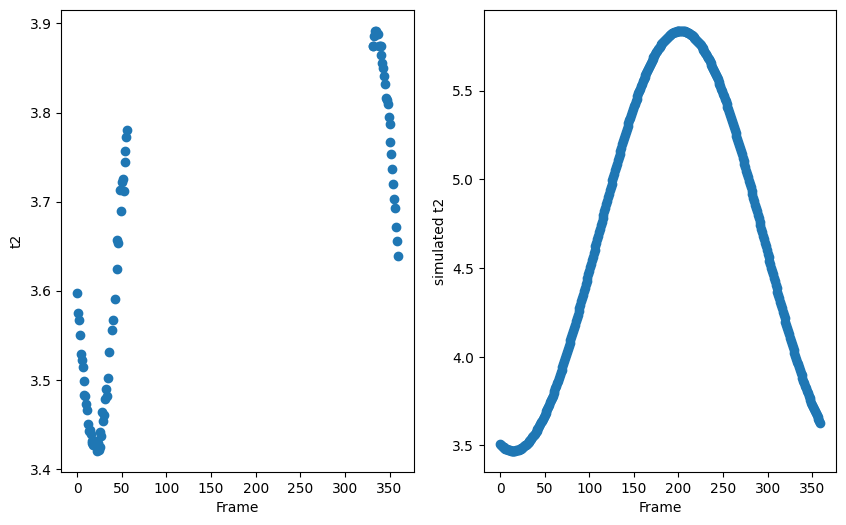

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(angles,t2s)
plt.xlabel('Frame')
plt.ylabel('t2')
plt.subplot(1,2,2)
plt.scatter(simulated_angles,simulated_t2s)
plt.xlabel('Frame')
plt.ylabel('simulated t2')

In [51]:
angles[0:50]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 36, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55],
      dtype=int64)

Text(0, 0.5, 'simulated t2')

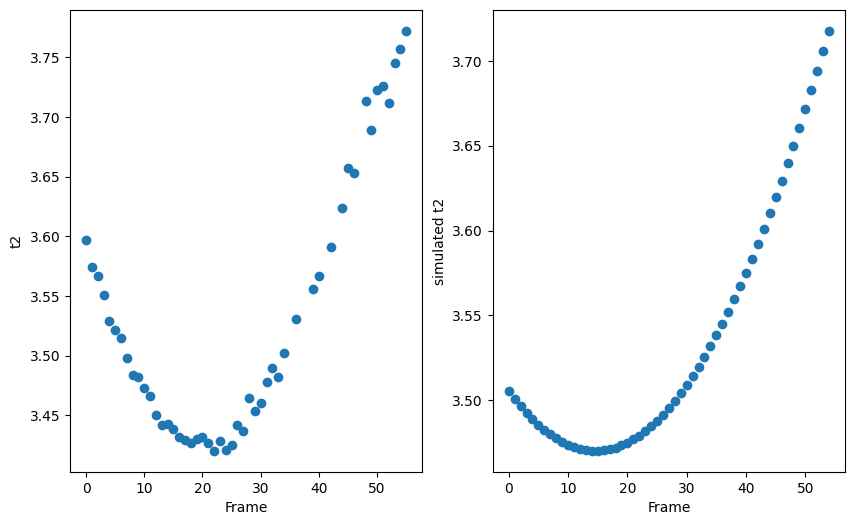

In [52]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(angles[0:50],t2s[0:50])
plt.xlabel('Frame')
plt.ylabel('t2')
plt.subplot(1,2,2)
plt.scatter(simulated_angles[0:55],simulated_t2s[0:55])
plt.xlabel('Frame')
plt.ylabel('simulated t2')